Ticker: Yndx
Update price: 2052
YNDX | R 2052.0 | MCap 741.1 R bn | VS ATH -65% | VS IPO 193% | EV/EBITDA 12.4 | P/E 44.2 | DY 0.0% | FF 88% | ADTV 827 R mn


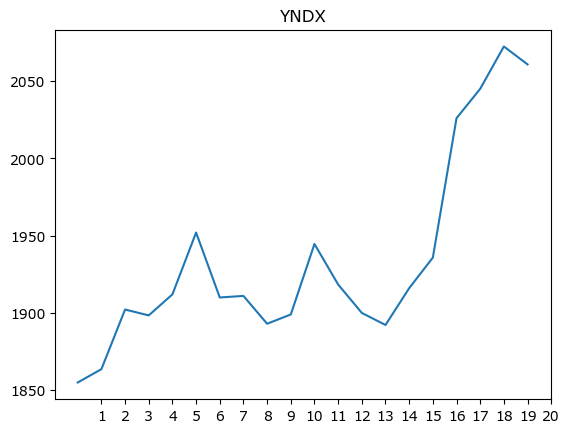

In [4]:
import json
import requests
import matplotlib.pyplot as plt
#from PIL import Image

with open("data.json") as f:
    data = json.load(f)

ticker = input("Ticker: ").strip().upper()

if ticker in data.keys():
    price = float(input("Update price: "))

    mcap_mn = price * data[ticker]["shares_mn"]
    ev_mn = mcap_mn + data[ticker]["net_debt_mn"]

    data[ticker]["price"] = price
    data[ticker]["mcap_mn"] = mcap_mn
    data[ticker]["ev_mn"] = ev_mn

    ev_ebitda = ev_mn / data[ticker]["ebitda_1_mn"]
    p_e = mcap_mn / data[ticker]["np_1_mn"]
    dy = data[ticker]["dps_1"] / price * 100
    vs_ath = (price / data[ticker]["ath"] - 1) * 100
    vs_ipo = (price / data[ticker]["ipo"] - 1) * 100
    ff = data[ticker]["ff"]

response = json.loads(requests.get(
    "https://iss.moex.com/iss/history/engines/stock/markets/shares/securities/" + ticker + ".json?from=2023-01-01").text)

last_twenty = [round(day[5] / 1000000, 1) for day in response["history"]["data"]][-20:]
adtv = round(sum(last_twenty) / len(last_twenty))

last_twenty_chart = [day[9] for day in response["history"]["data"]][-20:]
plt.plot(last_twenty_chart)
plt.xticks(range(1, 21))
plt.title(f"{ticker}")
plt.savefig("chart.png")
#chart = Image.open("chart.png")

output = f"{ticker} | R {price} | MCap {round((mcap_mn / 1000), 1)} R bn | VS ATH {round(vs_ath)}% | VS IPO {round(vs_ipo)}% | EV/EBITDA {ev_ebitda:.1f} | P/E {round(p_e, 1)} | DY {round(dy, 1)}% | FF {ff}% | ADTV {adtv} R mn"

print(output)
#chart.show()

with open("data.json", "w") as f:
    json.dump(data, f)

with open("output.txt", "w") as fp:
    json.dump(output, fp)